<a href="https://colab.research.google.com/github/one-last-time/FTFL/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = datasets.load_diabetes()
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
print(df.data[0])
print(diabetes_X[0])
print(diabetes_y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
[0.06169621]
151.0


In [ ]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:

# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
diabetes_y_pred[19]

84.39906679897157

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Mean squared error: 2548.07
Coefficient of determination: 0.47


In [ ]:
print ("Score:", regr.score(diabetes_X_test, diabetes_y_test))

Score: 0.4725754479822714


In [ ]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(regr,diabetes_X,diabetes_y,cv=3)
cv_result

{'fit_time': array([0.0007813 , 0.00109673, 0.00057817]),
 'score_time': array([0.00079274, 0.00080371, 0.00128055]),
 'test_score': array([0.2861453 , 0.39028236, 0.33343477])}

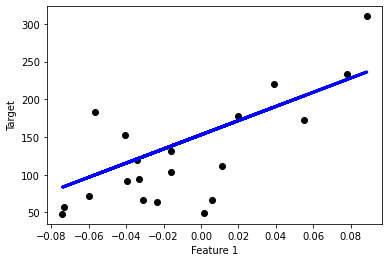

In [ ]:


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=2)


In [ ]:
poly.fit(diabetes_X_train, diabetes_y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

422

In [ ]:
diabetes_X_train.shape

(422, 1)

In [ ]:
X_poly = poly.fit_transform(diabetes_X_train)


In [ ]:
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: ignored

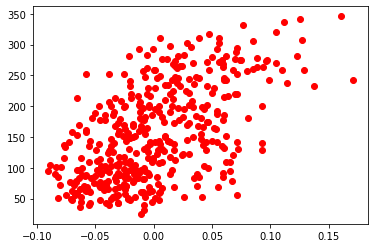

In [ ]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='red')
plt.plot(diabetes_X_train, pol_reg.predict(diabetes_X_train), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
diabetes_y_pred = poly.fit_transform(diabetes_X_test)


array([[ 1.00000000e+00,  7.78633876e-02,  6.06270713e-03],
       [ 1.00000000e+00, -3.96181284e-02,  1.56959610e-03],
       [ 1.00000000e+00,  1.10390390e-02,  1.21860383e-04],
       [ 1.00000000e+00, -4.06959405e-02,  1.65615957e-03],
       [ 1.00000000e+00, -3.42290681e-02,  1.17162910e-03],
       [ 1.00000000e+00,  5.64997868e-03,  3.19222590e-05],
       [ 1.00000000e+00,  8.86415084e-02,  7.85731701e-03],
       [ 1.00000000e+00, -3.31512560e-02,  1.09900577e-03],
       [ 1.00000000e+00, -5.68631216e-02,  3.23341460e-03],
       [ 1.00000000e+00, -3.09956318e-02,  9.60729193e-04],
       [ 1.00000000e+00,  5.52293341e-02,  3.05027934e-03],
       [ 1.00000000e+00, -6.00965578e-02,  3.61159626e-03],
       [ 1.00000000e+00,  1.33873038e-03,  1.79219903e-06],
       [ 1.00000000e+00, -2.34509473e-02,  5.49946930e-04],
       [ 1.00000000e+00, -7.41081148e-02,  5.49201268e-03],
       [ 1.00000000e+00,  1.96615356e-02,  3.86575984e-04],
       [ 1.00000000e+00, -1.59062628e-02

In [ ]:
diabetes_y_test[0:10]

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66.])

In [ ]:
diabetes_y_pred[0]

array([1.        , 0.07786339, 0.00606271])

In [ ]:
new_y = np.array([[(i[0]+i[1]*x+i[2]*x)] for i,x in zip(diabetes_y_pred,diabetes_y_test)])


array([[20.55478008],
       [-2.46241644],
       [ 2.23885984],
       [-4.9340467 ],
       [-2.96689267],
       [ 1.38068736],
       [30.91463587],
       [-2.01291152],
       [-8.81423638],
       [-0.98230357],
       [11.08237312],
       [-3.06691723],
       [ 1.06568561],
       [-0.46566402],
       [-2.2935729 ],
       [ 4.56856387],
       [-0.62793837],
       [-1.06622948],
       [ 9.92936105],
       [-2.85872202]])

In [ ]:
diabetes_y_pred = diabetes_y_pred.flatten()

In [ ]:
xarr = np.arange(1,diabetes_y_pred.size+1,1)

In [ ]:
diabetes_y_pred

array([ 1.00000000e+00,  7.78633876e-02,  6.06270713e-03,  1.00000000e+00,
       -3.96181284e-02,  1.56959610e-03,  1.00000000e+00,  1.10390390e-02,
        1.21860383e-04,  1.00000000e+00, -4.06959405e-02,  1.65615957e-03,
        1.00000000e+00, -3.42290681e-02,  1.17162910e-03,  1.00000000e+00,
        5.64997868e-03,  3.19222590e-05,  1.00000000e+00,  8.86415084e-02,
        7.85731701e-03,  1.00000000e+00, -3.31512560e-02,  1.09900577e-03,
        1.00000000e+00, -5.68631216e-02,  3.23341460e-03,  1.00000000e+00,
       -3.09956318e-02,  9.60729193e-04,  1.00000000e+00,  5.52293341e-02,
        3.05027934e-03,  1.00000000e+00, -6.00965578e-02,  3.61159626e-03,
        1.00000000e+00,  1.33873038e-03,  1.79219903e-06,  1.00000000e+00,
       -2.34509473e-02,  5.49946930e-04,  1.00000000e+00, -7.41081148e-02,
        5.49201268e-03,  1.00000000e+00,  1.96615356e-02,  3.86575984e-04,
        1.00000000e+00, -1.59062628e-02,  2.53009196e-04,  1.00000000e+00,
       -1.59062628e-02,  

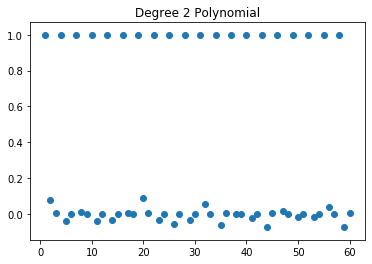

In [ ]:
plt.scatter(xarr, diabetes_y_pred)
plt.title("Degree 2 Polynomial")
plt.show()


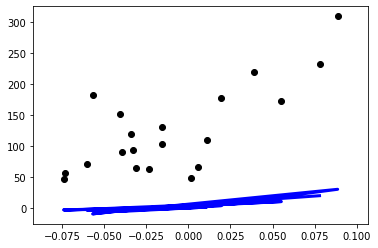

In [ ]:
import operator

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, new_y, color='blue', linewidth=3)
# sort the values of x before line plot


In [ ]:
diabetes_y_pred[0]

array([1.        , 0.07786339, 0.00606271])

NameError: ignored

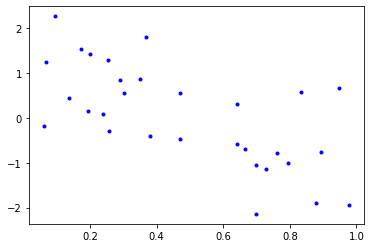

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

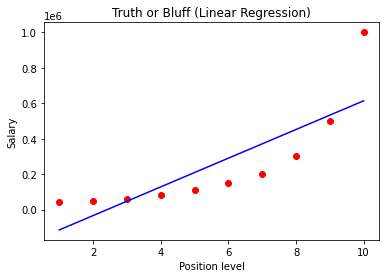

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
diabetes_X_train.shape

(422, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(diabetes_X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, diabetes_y_train)

NameError: ignored

In [ ]:
pol_reg.fit(X_poly, y)

ValueError: ignored

In [ ]:
new_p = pol_reg.predict(poly_reg.fit_transform(diabetes_X_test))
#poly_reg.fit_transform(diabetes_X_test)

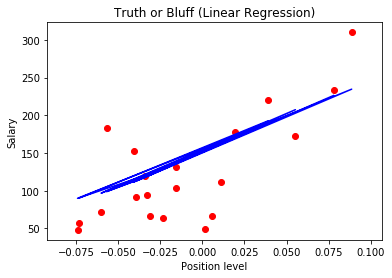

In [ ]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')
plt.plot(diabetes_X_test, new_p, color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99826465]), array([[1.04067723, 0.49460408]]))

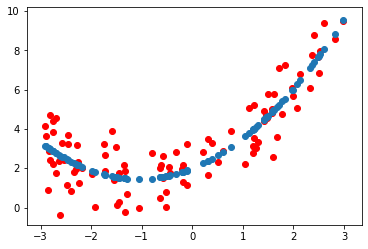

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color="red")
plt.scatter(X, lin_reg.predict(poly_features.fit_transform(X)))

In [ ]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_3_polynomial_regression/Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
# Step 2 - Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

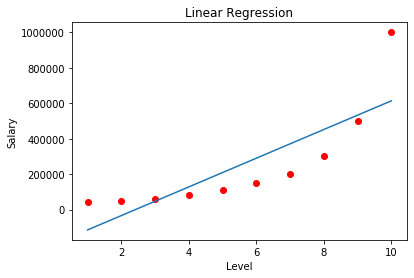

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

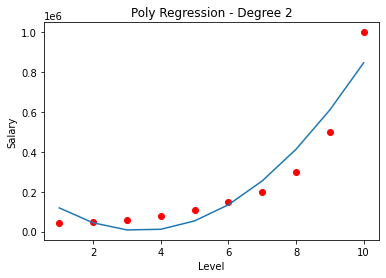

In [ ]:
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression - Degree 2")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
new_salary_pred

array([189498.10606061])

## Logistic Regression

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris["target"].size)

150


In [ ]:
import numpy as np
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [ ]:
iris["target"][0:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#X_new = np.linspace(0, 3, 1000)
#X_new.reshape(-1,1)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba[:]

In [ ]:
y_proba1 = log_reg.predict([[2.1],[1.1],[4.3]])
y_proba1[:]

array([1, 0, 1])

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
#X_new

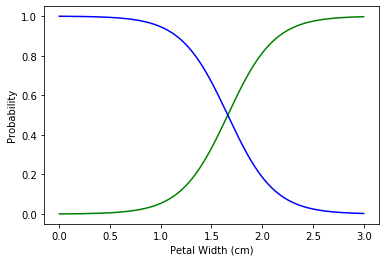

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Iris-Virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.show()



> The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while
the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm
to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the
flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between
these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict()
method rather than the predict_proba() method), it will return whichever class is the most likely.



## Gaussian NB

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
   % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [ ]:
yP = gnb.predict([[5.1,2.2,4.1,0.5]])
yP 

array([1])

## Multinomial NB

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[3]


In [ ]:
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
X

array([[3, 4, 0, 1, 3, 0, 0, 1, 4, 4, 1, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 1,
        1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0, 3, 2, 1, 0, 3, 1, 1, 3, 4, 0, 1,
        3, 4, 2, 4, 0, 3, 1, 2, 0, 4, 1, 2, 2, 1, 0, 1, 3, 4, 3, 1, 3, 0,
        0, 2, 2, 1, 3, 4, 2, 0, 0, 1, 1, 3, 0, 0, 4, 2, 4, 3, 3, 0, 3, 4,
        3, 4, 4, 4, 1, 0, 4, 2, 0, 2, 4, 1],
       [1, 0, 2, 4, 4, 0, 4, 1, 4, 1, 0, 2, 3, 1, 2, 4, 4, 2, 2, 0, 1, 2,
        2, 0, 1, 2, 4, 0, 1, 2, 1, 4, 2, 0, 0, 1, 0, 1, 3, 1, 1, 4, 4, 3,
        0, 3, 0, 3, 1, 2, 4, 0, 0, 3, 1, 1, 0, 0, 4, 2, 3, 4, 2, 0, 3, 3,
        1, 2, 4, 3, 0, 0, 4, 2, 4, 2, 0, 3, 0, 0, 4, 2, 1, 0, 4, 3, 0, 1,
        2, 4, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3],
       [2, 4, 4, 0, 3, 3, 0, 3, 1, 0, 2, 2, 2, 0, 2, 1, 4, 0, 4, 4, 1, 3,
        1, 4, 1, 2, 1, 0, 0, 2, 4, 1, 0, 0, 3, 1, 0, 4, 3, 2, 3, 4, 4, 3,
        0, 0, 0, 4, 1, 4, 1, 2, 2, 4, 3, 4, 4, 0, 3, 2, 4, 3, 4, 2, 3, 0,
        2, 1, 3, 2, 0, 1, 4, 1, 3, 3, 1, 2, 0, 2, 4, 0, 2, 4, 3, 4, 3, 0,
        4, 2, 2, 4, 1,

## K-NN

In [ ]:
iris = load_iris()

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
# response vector in a object named y
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=4)

In [ ]:
X_test[0]

array([6.4, 2.8, 5.6, 2.1])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

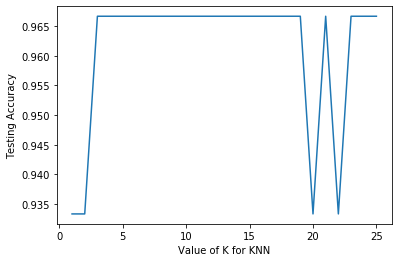

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


In [ ]:
knn.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [ ]:
pip install cairocffi

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88591 sha256=98ce5f2286f5abf94c9d9d4287d2c52420e5c586ccd14dd05540f0b8ef097fca
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi


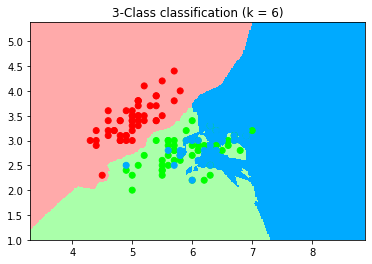

In [ ]:

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [ ]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn import preprocessing

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# make prediction
sl = input('Enter sepal length (cm): ')
sw = input('Enter sepal width (cm): ')
dataClass = clf.predict([[sl,sw]])
print('Prediction: '),

if dataClass == 0:
  print('Iris Setosa')
elif dataClass == 1:
  print('Iris Versicolour')
else:
  print('Iris Virginica')

Enter sepal length (cm): 4.5
Enter sepal width (cm): 4.1
Prediction: 
Iris Setosa


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:604: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


## Decision Tree

In [ ]:
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

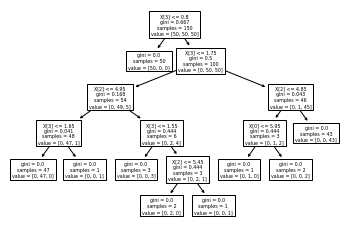

In [ ]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("iris")  

'iris.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True) 

In [ ]:
X[76]

array([6.8, 2.8, 4.8, 1.4])

In [ ]:
y[76]

1

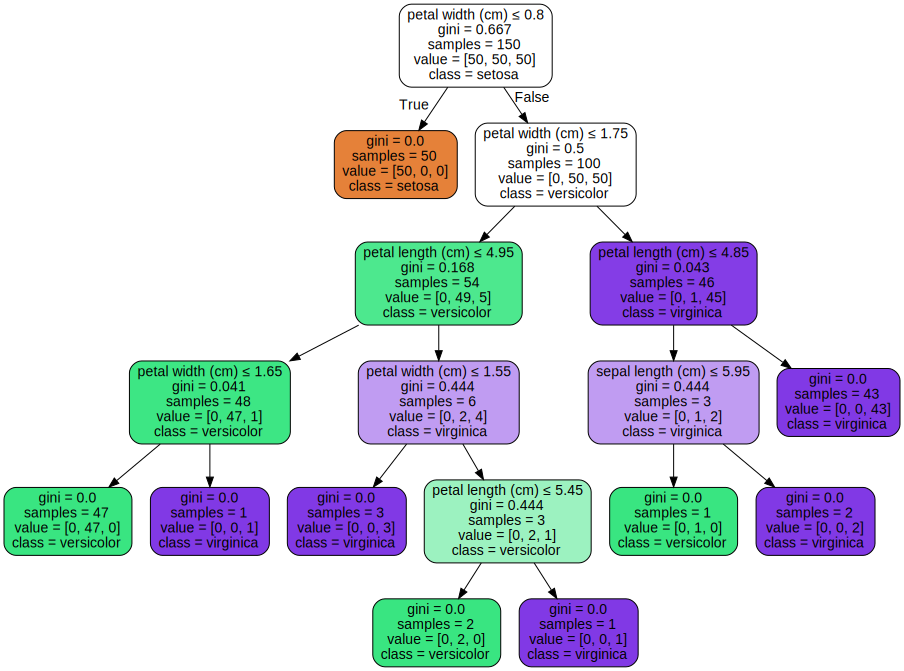

In [ ]:
graph = graphviz.Source(dot_data)
graph 

## SVM

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC



> The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM
model (using the LinearSVC class with C = 0.1 and the hinge loss function to detect
Iris-Virginica flowers.



In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

####Nonlinear SVM Classification

> To implement this idea using Scikit-Learn, you can create a Pipeline containing a PolynomialFeatures
transformer (discussed in “Polynomial Regression”), followed by a StandardScaler and a LinearSVC.



In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
))
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


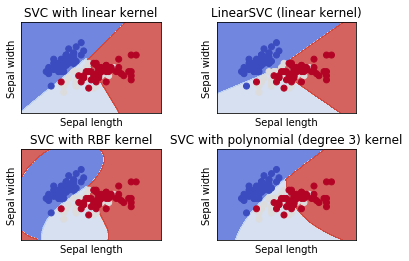

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()